In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import path
import sys, inspect
current_dir = path.dirname(path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from nu_aesthetics.single_colors import brand, design
from matplotlib.cm import register_cmap


from support.shared_consts import *
from support.utils import *

# Model

$Y = \beta_0 + \beta_1 x_1 + \dots + \beta_k x_k + \epsilon$

## Canonical X

Intercept    7.680093
x            1.288105
dtype: float64


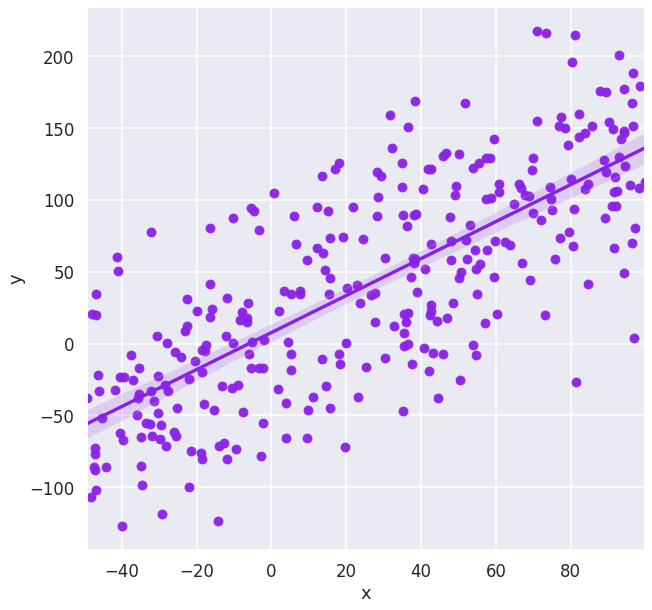

In [3]:
x = x_fix.copy()
e = e_fix.copy()
y = y_fix.copy()
data = pd.DataFrame({"x": x, "e": e, "y": y})

regressor = smf.ols(formula="y ~ x", data=data).fit()
print(regressor.params)

with sns.plotting_context("talk"):
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.scatterplot(x="x", y="y", data=data, color=brand.NU_LIGHT_PURPLE_MATPLOT)
    sns.regplot(x="x", y="y", data=data, color=brand.NU_BRIGHT_PURPLE_MATPLOT)
    plt.show()

## Outliers

Leverage: an outlier in the X space has high leverage.  
High leverage points tend to have low residuals $E_i$ because they can influence the coefficients!!! When they a in-line with the data, they also increase the confidence on the estimates/decreases variance estimates!!!<br/>
Hat values $h_i$ measure it. Heuristically, an outlier has $h_i > 2\bar{h}$ or $3\bar{h}$, with $\bar{h} = (k+1) / n$ for the OLS regression.  

Discrepancy: how far from the tendency is the point; an "in-line" observation has low discrepancy.  

Regresion outlier: how unusual is a point on Y given X; how far from the centroid in the XY space.  
Deleted studentized residual $E^*_i$: good for detecting outliers. Heuristically, an outlier has $|E^*_i| > 2$ or $3$.

The influence on coefficients is `Influence = Leverage X Discrepancy`.<br/>
Cook's distance: measures how influential is a point on the coefficients

In [4]:
np.random.seed(seed)
idx = np.random.randint(0, n, 1)

**Low leverage, high discrepancy**

Intercept    7.846298
x            1.280766
dtype: float64


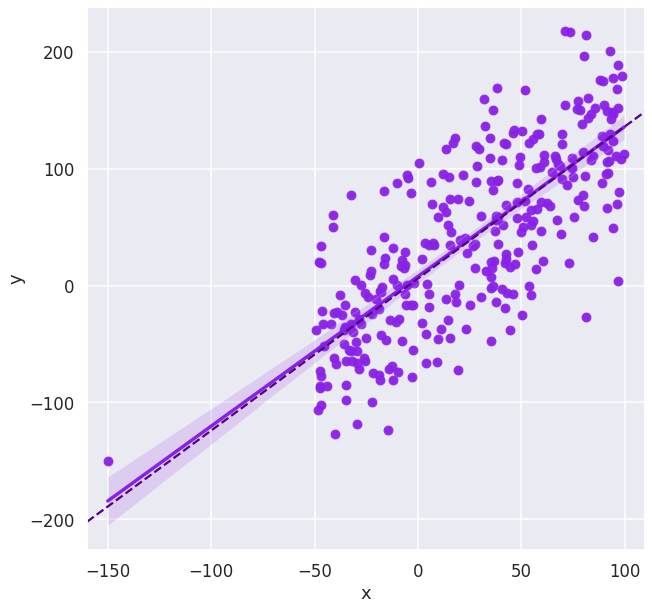

In [5]:
x = x_fix.copy()
e = e_fix.copy()
y = y_fix.copy()
x[idx] = -150
y[idx] = -150
data = pd.DataFrame({"x": x,
                     "e": e,
                     "y": y})

regressor = smf.ols(formula="y ~ x", data=data).fit()
print(regressor.params)

with sns.plotting_context("talk"):
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.scatterplot(x="x", y="y", data=data, color=brand.NU_LIGHT_PURPLE_MATPLOT)
    sns.regplot(x="x", y="y", data=data, color=brand.NU_BRIGHT_PURPLE_MATPLOT)
    ax.axline((0, true_params["b0"]), slope=true_params["b1"], color=brand.NU_DARK_PURPLE_MATPLOT, linestyle="--")
    ax.set_xlim(x.min()-10, x.max()+10)
    plt.savefig(f"../imgs/simul_high_leverage_low_discrepancy.png", bbox_inches="tight")
    plt.show()

**Low leverage, high discrepancy**

Intercept    6.517064
x            1.273340
dtype: float64


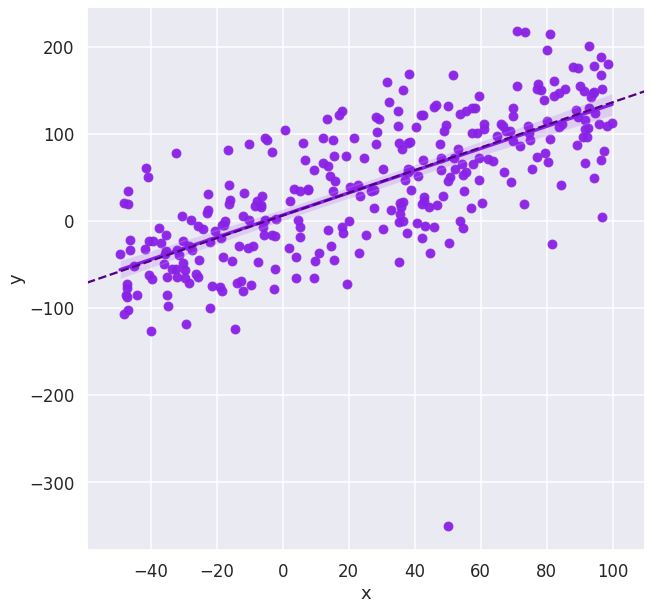

In [6]:
x = x_fix.copy()
e = e_fix.copy()
y = y_fix.copy()
x[idx] = 50
y[idx] = -350
data = pd.DataFrame({"x": x,
                     "e": e,
                     "y": y})

regressor = smf.ols(formula="y ~ x", data=data).fit()
print(regressor.params)

with sns.plotting_context("talk"):
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.scatterplot(x="x", y="y", data=data, color=brand.NU_LIGHT_PURPLE_MATPLOT)
    sns.regplot(x="x", y="y", data=data, color=brand.NU_BRIGHT_PURPLE_MATPLOT)
    ax.axline((0, true_params["b0"]), slope=true_params["b1"], color=brand.NU_DARK_PURPLE_MATPLOT, linestyle="--")
    ax.set_xlim(x.min()-10, x.max()+10)
    plt.savefig(f"../imgs/simul_low_leverage_high_discrepancy.png", bbox_inches="tight")
    plt.show()

**High leverage, high discrepancy**

Intercept    9.986489
x            1.222041
dtype: float64


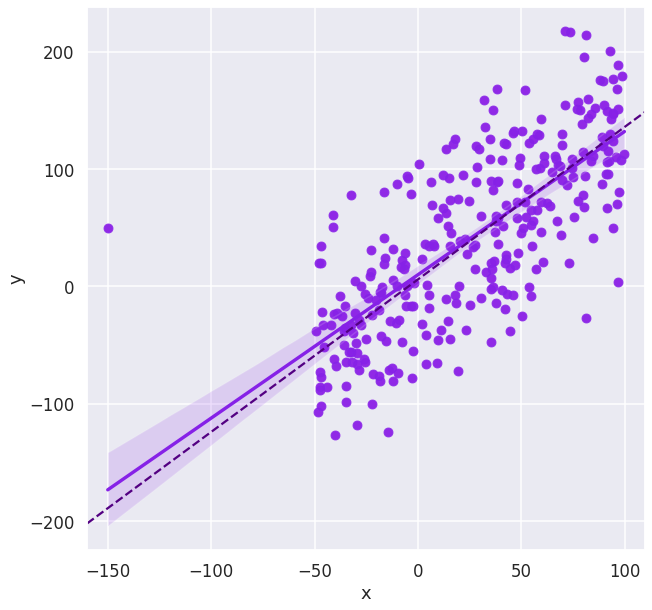

In [7]:
x = x_fix.copy()
e = e_fix.copy()
y = y_fix.copy()
x[idx] = -150
y[idx] = 50
data = pd.DataFrame({"x": x,
                     "e": e,
                     "y": y})

regressor = smf.ols(formula="y ~ x", data=data).fit()
print(regressor.params)

with sns.plotting_context("talk"):
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.scatterplot(x="x", y="y", data=data, color=brand.NU_LIGHT_PURPLE_MATPLOT)
    sns.regplot(x="x", y="y", data=data, color=brand.NU_BRIGHT_PURPLE_MATPLOT)
    ax.axline((0, true_params["b0"]), slope=true_params["b1"], color=brand.NU_DARK_PURPLE_MATPLOT, linestyle="--")
    ax.set_xlim(x.min()-10, x.max()+10)
    plt.savefig(f"../imgs/simul_high_leverage_high_discrepancy.png", bbox_inches="tight")
    plt.show()